In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/train_data.csv'
file_key_2 = 'AmericanExpress/train_labels.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading data-files
train = pd.read_csv(file_content_stream_1, dtype = dtype_dict)
target = pd.read_csv(file_content_stream_2)

## Appending target variables
train = pd.merge(train, target, on = 'customer_ID', how = 'left')
train.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.0048

## Feature Engineering of Deliquency Variables

In [19]:
## Selecting Deliquency variables
my_variables = train.columns
D_variables = [x for x in my_variables if x.startswith('D_')]
to_select = ['customer_ID', 'target']
for i in range(2, (len(D_variables) + 2)):
    to_select.append(D_variables[i-2])

train_deli = train[to_select]
train_deli.head()

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.001734,0.008774,NaN,NaN,0.000630,0.708984,0.358643,0.525391,0.255615,NaN,0.148682,1.335938,0.207275,NaN,1.001953,0.354492,0.151978,0.158569,0.063660,0.199585,0.308350,0.091064,CR,O,0.007126,NaN,6.0,0.009010,0.008339,0.119385,0.004803,NaN,0.080444,0.069092,NaN,NaN,0.001575,0.004238,0.004059,0.003532,0.506836,0.007042,0.000830,0.007084,NaN,NaN,0.002665,1.503906,1.005859,0.003569,0.008873,0.004951,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,NaN,0.004326,NaN,NaN,1.007812,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.002052,0.005970,NaN,0.004345,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.005775,0.000798,NaN,NaN,0.002525,0.712891,0.353516,0.521484,0.223389,NaN,0.149780,1.339844,0.202759,NaN,1.008789,0.326660,0.156250,0.148438,0.065491,0.151367,0.265137,0.086792,CR,O,0.002413,NaN,6.0,0.007843,0.006523,0.140625,0.000094,NaN,0.081421,0.074158,NaN,NaN,0.009895,0.007599,0.000126,0.007774,0.500977,0.007790,0.009468,0.006676,NaN,NaN,0.002508,1.503906,1.005859,0.000571,0.000391,0.003180,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,NaN,0.008705,NaN,NaN,1.007812,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.001034,0.004837,NaN,0.007496,NaN,NaN,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.091492,0.007599,NaN,NaN,0.007607,0.720703,0.334717,0.524414,0.189453,NaN,0.151978,1.336914,0.206665,NaN,1.008789,0.304199,0.153809,0.139526,0.070618,0.305908,0.212158,0.093994,CR,O,0.001878,NaN,6.0,0.006023,0.002615,0.075867,0.007153,NaN,0.078918,0.076538,NaN,NaN,0.009628,0.003094,0.000954,0.008812,0.504395,0.004093,0.002325,0.001185,NaN,NaN,0.009636,1.502930,1.005859,0.007427,0.009232,0.005432,0.806641,1.002930,1.009766,0.928711,NaN,0.670898,NaN,0.004093,NaN,NaN,1.003906,0.003269,1.0,0.239868,0.0,4.0,0.240723,0.239746,0.0,0.705078,0.434326,0.003956,0.689941,0.009621,1.0,1.009766,1.007812,1.006836,0.005680,0.005497,NaN,0.009224,NaN,NaN,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002455,0.000685,NaN,NaN,0.006405,0.724121,0.323242,0.530762,0.135620,NaN,0.151245,1.339844,0.208252,NaN,1.007812,0.275146,0.155762,0.138062,0.065918,0.273438,0.204346,0.094849,CR,O,0.005898,NaN,6.0,0.005272,0.002052,0.150269,0.005363,NaN,0.077515,0.071533,NaN,NaN,0.008568,0.003895,0.005665,0.004650,0.508789,0.008820,0.005924,0.003325,NaN,NaN,0.007790,1.503906,1.006836,0.000664,0.003201,0.000063,0.808105,1.001953,1.004883,0.935547,NaN,0.672852,NaN,0.009705,NaN,NaN,1.002930,0.000053,1.0,0.240967,0.0,4.0,0.239380,0.240723,0.0,0.711426,0.437012,0.005135,0.687988,0.004650,1.0,1.001953,1.003906,1.007812,0.007107,0.008263,NaN,0.007206,NaN,NaN,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002483,0.004654,NaN,NaN,0.007732,0.720703,0.230957,0.529297,NaN,NaN,0.154053,1.341797,0.205444,NaN,1.003906,0.231079,0.154907,0.126465,0.063721,0.233154,0.175659,0.093933,CR,O,0.009476,NaN,6.0,0.000152,0.001419,0.096436,0.007973,NaN,0.076538,0.074463,NaN,NaN,0.003288,0.002607,0.004463,0.001141,0.506348,0.001844,0.00551

In [20]:
ID = train_deli['customer_ID'].unique()

train_deli[train_deli['customer_ID'] == ID[0]]

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.001734,0.008774,NaN,NaN,0.000630,0.708984,0.358643,0.525391,0.255615,NaN,0.148682,1.335938,0.207275,NaN,1.001953,0.354492,0.151978,0.158569,0.063660,0.199585,0.308350,0.091064,CR,O,0.007126,NaN,6.0,0.009010,0.008339,0.119385,0.004803,NaN,0.080444,0.069092,NaN,NaN,0.001575,0.004238,0.004059,0.003532,0.506836,0.007042,0.000830,0.007084,NaN,NaN,0.002665,1.503906,1.005859,0.003569,0.008873,0.004951,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,NaN,0.004326,NaN,NaN,1.007812,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.002052,0.005970,NaN,0.004345,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.005775,0.000798,NaN,NaN,0.002525,0.712891,0.353516,0.521484,0.223389,NaN,0.149780,1.339844,0.202759,NaN,1.008789,0.326660,0.156250,0.148438,0.065491,0.151367,0.265137,0.086792,CR,O,0.002413,NaN,6.0,0.007843,0.006523,0.140625,0.000094,NaN,0.081421,0.074158,NaN,NaN,0.009895,0.007599,0.000126,0.007774,0.500977,0.007790,0.009468,0.006676,NaN,NaN,0.002508,1.503906,1.005859,0.000571,0.000391,0.003180,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,NaN,0.008705,NaN,NaN,1.007812,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.001034,0.004837,NaN,0.007496,NaN,NaN,NaN,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.091492,0.007599,NaN,NaN,0.007607,0.720703,0.334717,0.524414,0.189453,NaN,0.151978,1.336914,0.206665,NaN,1.008789,0.304199,0.153809,0.139526,0.070618,0.305908,0.212158,0.093994,CR,O,0.001878,NaN,6.0,0.006023,0.002615,0.075867,0.007153,NaN,0.078918,0.076538,NaN,NaN,0.009628,0.003094,0.000954,0.008812,0.504395,0.004093,0.002325,0.001185,NaN,NaN,0.009636,1.502930,1.005859,0.007427,0.009232,0.005432,0.806641,1.002930,1.009766,0.928711,NaN,0.670898,NaN,0.004093,NaN,NaN,1.003906,0.003269,1.0,0.239868,0.0,4.0,0.240723,0.239746,0.0,0.705078,0.434326,0.003956,0.689941,0.009621,1.0,1.009766,1.007812,1.006836,0.005680,0.005497,NaN,0.009224,NaN,NaN,NaN,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002455,0.000685,NaN,NaN,0.006405,0.724121,0.323242,0.530762,0.135620,NaN,0.151245,1.339844,0.208252,NaN,1.007812,0.275146,0.155762,0.138062,0.065918,0.273438,0.204346,0.094849,CR,O,0.005898,NaN,6.0,0.005272,0.002052,0.150269,0.005363,NaN,0.077515,0.071533,NaN,NaN,0.008568,0.003895,0.005665,0.004650,0.508789,0.008820,0.005924,0.003325,NaN,NaN,0.007790,1.503906,1.006836,0.000664,0.003201,0.000063,0.808105,1.001953,1.004883,0.935547,NaN,0.672852,NaN,0.009705,NaN,NaN,1.002930,0.000053,1.0,0.240967,0.0,4.0,0.239380,0.240723,0.0,0.711426,0.437012,0.005135,0.687988,0.004650,1.0,1.001953,1.003906,1.007812,0.007107,0.008263,NaN,0.007206,NaN,NaN,NaN,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.002483,0.004654,NaN,NaN,0.007732,0.720703,0.230957,0.529297,NaN,NaN,0.154053,1.341797,0.205444,NaN,1.003906,0.231079,0.154907,0.126465,0.063721,0.233154,0.175659,0.093933,CR,O,0.009476,NaN,6.0,0.000152,0.001419,0.096436,0.007973,NaN,0.076538,0.074463,NaN,NaN,0.003288,0.002607,0.004463,0.001141,0.506348,0.001844,0.00551

In [21]:
train_deli[train_deli['customer_ID'] == ID[1]]

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
13,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.382812,0.001479,NaN,NaN,0.009872,0.239502,0.457764,0.382568,0.059357,NaN,NaN,0.334473,0.110474,NaN,1.008789,0.052826,0.684570,0.007069,0.230713,0.375244,0.063599,0.239258,CO,O,0.007912,NaN,6.0,0.006519,0.001395,0.015732,0.002945,NaN,0.000560,0.000939,NaN,0.222290,0.002569,0.000223,0.008209,0.002768,NaN,0.002874,0.004593,0.002583,NaN,NaN,0.009186,0.007530,0.000142,0.005409,0.008461,0.001770,0.001040,0.007942,0.007099,NaN,NaN,0.007599,NaN,0.009712,NaN,NaN,1.008789,0.005898,1.0,0.430176,0.0,-1.0,0.418457,0.416260,0.0,0.527344,0.292480,0.009933,0.137939,0.009583,1.0,0.008316,1.002930,0.003712,0.002148,0.003910,NaN,0.001288,NaN,NaN,NaN,NaN,NaN,0.003777,0.001808,0.008202,NaN,0.001061,0.000027,0.002628
14,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.002224,0.007828,NaN,NaN,0.007450,0.246948,0.462646,0.386230,0.083374,NaN,NaN,0.672363,0.105652,NaN,1.008789,0.060760,0.688965,0.004692,0.231445,0.295410,0.079285,0.237793,CO,O,0.006939,NaN,6.0,0.006329,0.003582,0.009995,0.009186,NaN,0.007648,0.001020,NaN,0.220459,0.002954,0.001704,0.008217,0.000363,NaN,0.006454,0.000343,0.009926,NaN,NaN,0.004662,0.504395,0.006718,0.005985,0.009171,0.004742,0.009590,0.000881,0.007603,NaN,NaN,0.003799,NaN,0.008125,NaN,NaN,1.006836,0.001209,1.0,0.436035,0.0,-1.0,0.426758,0.423096,1.0,0.534668,0.294189,0.007076,0.138062,0.006470,1.0,0.000664,1.003906,0.002510,0.003031,0.000364,NaN,0.001774,NaN,NaN,NaN,NaN,NaN,0.004047,0.008286,0.001375,NaN,0.010002,0.002668,0.006912
15,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.567383,0.003162,NaN,NaN,0.004219,0.243042,0.450439,0.385010,0.086914,NaN,NaN,0.666992,0.104553,NaN,1.001953,0.059967,0.717773,0.006134,0.237305,0.446777,0.081177,0.241089,CO,O,0.004089,NaN,6.0,0.008675,0.005806,0.014168,0.002117,NaN,0.002825,0.007835,NaN,0.225586,0.005302,0.004875,0.001601,0.001755,NaN,0.008812,0.002478,0.006180,NaN,NaN,0.002092,0.504395,0.008125,0.000546,0.002066,0.009972,0.008369,0.000075,0.001325,NaN,NaN,0.006165,NaN,0.009369,NaN,NaN,1.007812,0.009674,1.0,0.430176,0.0,-1.0,0.431885,0.428223,1.0,0.534180,0.288818,0.004585,0.140625,0.001776,1.0,0.002106,1.002930,0.006577,0.002806,0.001707,NaN,0.001329,NaN,NaN,NaN,NaN,NaN,0.007744,0.002693,0.009850,NaN,0.000997,0.003254,0.004471
16,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.213135,0.009514,NaN,NaN,0.001658,0.254150,0.442139,0.389404,0.036255,NaN,NaN,0.340332,0.110107,NaN,1.005859,0.052490,0.717285,0.005295,0.232300,0.333496,0.026947,0.234253,CO,O,0.000637,NaN,6.0,0.002172,0.000448,0.008911,0.009094,NaN,0.006569,0.006119,NaN,0.225220,0.001896,0.007874,0.004776,0.009552,NaN,0.002159,0.003820,0.006214,NaN,NaN,0.000274,0.002569,0.006702,0.003653,0.002560,0.004536,0.000723,0.001887,0.003704,NaN,NaN,0.006889,NaN,0.009163,NaN,NaN,1.000977,0.007076,1.0,0.436279,0.0,-1.0,0.428711,0.425293,0.0,0.526855,0.291992,0.002256,0.145264,0.000409,1.0,0.000546,1.002930,0.000623,0.006008,0.007027,NaN,0.006119,NaN,NaN,NaN,NaN,NaN,0.002502,0.003399,0.004284,NaN,0.002642,0.004326,0.006310
17,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.325439,0.000732,NaN,NaN,0.001454,0.248535,0.432373,0.388672,0.031982,NaN,NaN,0.341553,0.104980,NaN,1.005859,0.048859,0.717773,0.007023,0.237549,0.857422,0.028183,0.240601,CO,O,0.001527,NaN,6.0,0.007797,0.009781,0.005657,0.004879,NaN,0.003269,0.007771,NaN,0.222534,0.008446,0.004646,0.005669,0.004429,NaN,0.005360,0.003050,0.000137,NaN,NaN,0.000443,0.0

In [22]:
train_deli[train_deli['customer_ID'] == ID[2]]

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
26,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.001469,0.008400,NaN,NaN,0.001676,0.222412,0.438721,0.318359,0.081665,NaN,NaN,0.004265,0.200073,NaN,1.002930,0.073242,NaN,0.079285,0.234131,0.002542,0.050812,0.435059,CO,R,0.003073,NaN,6.0,0.009888,0.006409,0.015808,0.005871,NaN,0.080383,0.075684,NaN,0.407227,0.005608,0.002338,0.004410,0.000793,NaN,0.009872,0.003330,0.001764,NaN,NaN,0.009354,0.008041,0.007698,0.002043,0.001354,0.003355,0.008453,0.007919,0.002012,NaN,NaN,0.007103,NaN,0.008232,NaN,NaN,1.000977,0.007755,0.0,0.368652,0.0,-1.0,0.346680,0.338135,0.0,0.419922,0.145264,0.006527,0.278320,0.001961,1.0,0.004292,0.003515,0.001760,0.003925,0.004662,NaN,0.002304,NaN,NaN,NaN,NaN,NaN,0.003653,0.004395,0.002178,NaN,0.001196,0.002739,0.000443
27,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.004230,0.008011,NaN,NaN,0.007320,0.229126,0.437988,0.320068,0.038727,NaN,NaN,0.008797,0.203003,NaN,1.003906,0.057526,NaN,0.093506,0.235229,0.006279,0.174194,0.435547,CO,R,0.003595,NaN,6.0,0.002874,0.009377,0.008614,0.006737,NaN,0.071411,0.075867,NaN,0.403320,0.008034,0.005814,0.002857,0.001050,NaN,0.006115,0.008972,0.003807,NaN,NaN,0.004318,0.003059,0.007721,0.003590,0.003765,0.007317,0.007065,0.004696,0.000261,NaN,NaN,0.008362,NaN,0.003736,NaN,NaN,1.006836,0.008408,0.0,0.377197,0.0,-1.0,0.349854,0.353760,0.0,0.428467,0.148804,0.001088,0.279053,0.009193,1.0,0.006798,0.007790,0.008415,0.004009,0.009483,NaN,0.009445,NaN,NaN,NaN,NaN,NaN,0.002876,0.000841,0.009346,NaN,0.003332,0.009277,0.004498
28,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.003399,0.007538,NaN,NaN,0.004704,0.229248,0.437500,0.325439,0.042664,NaN,NaN,0.002537,0.201172,NaN,1.007812,0.058105,NaN,0.093994,0.230835,0.005508,0.166992,0.432861,CO,R,0.003830,NaN,6.0,0.007397,0.000965,0.015419,0.000417,NaN,0.072998,0.070007,NaN,0.408203,0.008568,0.000550,0.007801,0.005981,NaN,0.005150,0.000483,0.002827,NaN,NaN,0.009682,0.005619,0.000430,0.004009,0.005898,0.006512,0.007298,0.003777,0.001437,NaN,NaN,0.008980,NaN,0.009659,NaN,NaN,1.003906,0.000767,0.0,0.373047,0.0,-1.0,0.351807,0.344971,0.0,0.427002,0.151978,0.009010,0.278564,0.001232,1.0,0.000841,0.005611,0.009705,0.003708,0.001908,NaN,0.008629,NaN,NaN,NaN,NaN,NaN,0.003084,0.000304,0.000892,NaN,0.002981,0.009026,0.002958
29,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.006878,0.003960,NaN,NaN,0.004570,0.225830,0.488037,0.323975,0.099060,NaN,NaN,0.004627,0.199951,NaN,1.000977,0.070984,NaN,0.009659,0.231079,0.001941,0.092102,0.433594,CO,R,0.005600,NaN,6.0,0.006874,0.008919,0.011078,0.001172,NaN,0.000283,0.006550,NaN,0.408447,0.002674,0.003813,0.002275,0.005726,NaN,0.006649,0.008430,0.009224,NaN,NaN,0.008362,0.000681,0.007050,0.008003,0.002863,0.007629,0.001524,0.004509,0.001995,NaN,NaN,0.006298,NaN,0.003473,NaN,NaN,1.000977,0.001554,1.0,0.378174,0.0,-1.0,0.345703,0.346191,0.0,0.425293,0.145752,0.006287,0.274170,0.006695,1.0,0.000425,0.007759,0.004265,0.009918,0.008072,NaN,0.007767,NaN,NaN,NaN,NaN,NaN,0.007996,0.003723,0.005226,NaN,0.005043,0.001034,0.005859
30,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.000802,0.009033,NaN,NaN,0.008560,0.231689,0.453125,0.322998,0.072144,NaN,NaN,0.005768,0.198364,NaN,1.001953,0.071838,NaN,0.001232,0.233521,0.000553,0.098022,0.436768,CO,R,0.008095,NaN,6.0,0.008408,0.001134,0.007515,0.001454,NaN,0.002590,0.006039,NaN,0.404785,0.003733,0.000266,0.007858,0.007633,NaN,0.000662,0.006077,0.000869,NaN,NaN,0.007526,0.002485,0.002344,0.001739,0

In [23]:
train_deli[train_deli['customer_ID'] == ID[3]]

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
39,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.268555,0.007732,NaN,0.006634,0.006508,0.056396,0.471680,0.392334,0.176147,NaN,0.341309,0.000695,0.201782,0.006409,1.004883,0.094055,0.579590,0.006256,0.397705,0.081787,0.121826,0.435303,CO,O,0.002583,NaN,2.0,0.000213,0.008759,0.012169,0.004559,NaN,0.004951,0.004536,NaN,0.404541,0.002779,0.007736,0.005917,0.009544,NaN,0.009262,0.000332,0.004509,NaN,NaN,0.008224,0.008865,0.005920,0.006584,0.001147,0.002975,0.009338,0.004765,0.002026,NaN,NaN,0.006836,NaN,0.005180,NaN,NaN,0.007236,0.202515,1.0,0.495117,0.0,-1.0,0.036682,0.032135,0.0,0.615234,0.430176,0.000753,0.641113,0.000248,1.0,0.000757,1.000977,1.008789,0.008827,0.001781,NaN,0.004719,NaN,NaN,NaN,NaN,NaN,0.003296,0.004272,0.000242,NaN,0.006268,0.001873,0.007587
40,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.001641,0.005512,NaN,0.011948,0.001751,0.059357,0.468994,0.399170,0.177246,NaN,0.348145,0.009140,0.199097,0.000550,1.008789,0.090942,0.580078,0.003267,0.400391,0.205566,0.171631,0.437500,CO,O,0.008629,NaN,2.0,0.005646,0.000558,0.009293,0.000343,NaN,0.006603,0.002979,NaN,0.402344,0.002340,0.007214,0.005417,0.001617,NaN,0.009529,0.008492,0.004932,NaN,NaN,0.004658,0.004890,0.008560,0.003252,0.005211,0.005863,0.007919,0.007896,0.009064,NaN,NaN,0.009048,NaN,0.003986,NaN,NaN,0.009132,0.201538,1.0,0.494873,0.0,-1.0,0.044891,0.042023,0.0,0.613770,0.436768,0.003101,0.637695,0.008972,1.0,0.006950,1.000977,1.008789,0.001575,0.001338,NaN,0.005779,NaN,NaN,NaN,NaN,NaN,0.007133,0.009735,0.006760,NaN,0.009193,0.002682,0.009766
41,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.206909,0.008667,NaN,0.007240,0.008003,0.062988,0.385742,0.398926,NaN,NaN,0.449219,0.007629,0.200684,0.000346,1.004883,0.070496,0.571777,0.001961,0.398682,0.474365,NaN,0.440430,CO,O,0.002316,NaN,6.0,0.006275,0.004803,0.006401,0.009361,NaN,0.003004,0.003044,NaN,0.407959,0.008934,0.004597,0.007904,0.000958,NaN,0.009773,0.009171,0.005619,NaN,NaN,0.007133,0.003862,0.007679,0.009178,0.004234,0.007488,0.008423,0.002291,0.008713,NaN,NaN,0.000947,NaN,0.004284,NaN,NaN,0.005730,0.207764,1.0,0.499756,0.0,-1.0,0.041382,0.038330,0.0,0.616699,0.434814,0.008621,0.643066,0.009117,1.0,0.001377,1.006836,1.006836,0.005619,0.004730,NaN,0.009529,NaN,NaN,NaN,NaN,NaN,0.004131,0.003134,0.007118,NaN,0.003069,0.000492,0.004726
42,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.093506,0.003695,NaN,0.149902,0.003492,0.063660,0.384277,0.399902,NaN,NaN,0.453613,0.000235,0.199341,0.001295,1.002930,0.066162,0.575684,0.001230,0.422363,1.004883,NaN,NaN,CO,O,0.002539,NaN,6.0,0.002953,0.000772,0.003347,0.003216,NaN,0.006916,0.008621,NaN,NaN,0.007053,0.008949,0.002506,0.006958,NaN,0.009300,0.001560,0.001609,NaN,NaN,0.000387,0.004852,0.007534,0.002594,0.001439,0.000890,0.007240,0.000808,0.001399,NaN,NaN,0.008087,NaN,0.006306,NaN,NaN,0.005974,0.204590,1.0,0.045868,0.0,6.0,0.040802,0.044434,0.0,0.614258,0.292725,0.004646,0.596680,0.003025,1.0,0.003874,1.003906,1.007812,0.002769,0.004570,NaN,0.001235,NaN,NaN,NaN,NaN,NaN,0.009117,0.005684,0.006939,NaN,0.009422,0.007504,0.007469
43,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.000660,0.004135,NaN,0.114502,0.003027,0.066040,0.395508,0.397949,NaN,NaN,0.479492,0.009651,0.203247,0.008766,1.006836,0.062225,0.576660,0.006836,0.423828,1.001953,NaN,NaN,CO,O,0.005825,NaN,3.0,0.003454,0.008415,0.006367,0.003685,NaN,0.009308,0.006660,NaN,NaN,0.009583,0.009682,0.005642,0.008835,NaN,0.005245,0.007965,0.008

In [24]:
train_deli[train_deli['customer_ID'] == ID[4]]

,customer_ID,target,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_86,D_87,D_88,D_89,D_91,D_92,D_93,D_94,D_96,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
52,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.006573,0.008263,NaN,0.061951,0.002741,0.288574,0.464111,0.465820,0.141602,NaN,0.136230,0.341064,0.193726,NaN,1.005859,0.125488,0.172852,0.335693,0.279053,0.003771,0.179932,0.065063,CO,O,0.002052,1.0,6.0,0.008453,0.254395,0.011642,0.003647,NaN,0.147217,0.135620,NaN,0.062561,0.007740,0.006222,0.209473,0.000519,NaN,0.004341,0.007431,0.005028,NaN,NaN,0.003355,0.001914,0.003994,0.002157,0.007912,0.005997,0.369141,1.008789,0.957031,0.632812,NaN,1.009766,NaN,0.005768,NaN,NaN,1.009766,0.007305,1.0,0.425781,0.0,4.0,0.419434,0.412842,0.0,0.542480,0.435303,0.007114,0.190430,0.002308,1.0,0.001711,1.001953,1.007812,1.007812,0.004456,NaN,0.003387,NaN,NaN,NaN,NaN,NaN,0.005737,0.008316,0.005421,NaN,0.005547,0.003866,0.001375
53,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.008682,0.009163,NaN,0.060486,0.001016,0.292480,0.458740,0.463135,0.137817,NaN,0.134521,0.336914,0.192383,NaN,1.008789,0.127930,0.175293,0.340332,0.275146,0.006378,0.176636,0.085327,CO,O,0.001800,1.0,6.0,0.002958,0.255371,0.010689,0.004848,NaN,0.146118,0.134521,NaN,NaN,0.008881,0.002382,0.204468,0.002333,NaN,0.002546,0.001027,0.005352,NaN,NaN,0.005001,0.008759,0.006237,0.000827,0.005589,0.006699,0.380859,1.007812,0.957031,0.648438,NaN,1.008789,NaN,0.001143,NaN,NaN,1.000977,0.005608,1.0,0.425781,0.0,4.0,0.421143,0.424316,0.0,0.542969,0.432373,0.006088,0.190186,0.008560,1.0,0.009720,1.004883,1.000977,1.001953,0.009666,NaN,0.001776,NaN,NaN,NaN,NaN,NaN,0.005939,0.006710,0.006493,NaN,0.000468,0.004475,0.009666
54,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.003937,0.000545,NaN,0.051788,0.006298,0.294678,0.516113,0.463135,0.263672,NaN,0.076355,0.004433,0.192871,NaN,1.008789,0.177368,0.169189,0.331055,0.292969,0.002996,0.174561,0.081482,CO,O,0.009773,1.0,6.0,0.006809,0.259277,0.015854,0.001571,NaN,0.150146,0.137817,NaN,NaN,0.003895,0.000551,0.004398,0.007385,NaN,0.007252,0.005722,0.001287,NaN,NaN,0.000116,0.005466,0.006222,0.000029,0.003084,0.002800,0.413086,1.000000,0.958496,0.661621,NaN,1.002930,NaN,0.000268,NaN,NaN,1.009766,0.001087,1.0,0.425049,0.0,4.0,0.418701,0.419434,0.0,0.547363,0.438232,0.003239,0.187134,0.006195,1.0,0.009094,1.005859,1.000000,1.005859,0.001219,NaN,0.002394,NaN,NaN,NaN,NaN,NaN,0.008102,0.006130,0.003267,NaN,0.008812,0.001211,0.001624
55,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.003536,0.000970,NaN,0.049561,0.000342,0.299561,0.516113,0.461426,0.264160,NaN,0.073853,0.005432,0.191772,NaN,1.008789,0.178955,0.163696,0.320068,0.319092,0.002243,0.130127,0.087036,CO,O,0.003376,1.0,6.0,0.004566,0.259766,0.010712,0.009186,NaN,0.147339,0.137207,NaN,NaN,0.002975,0.006226,0.204346,0.002375,NaN,0.002090,0.003748,0.009209,NaN,NaN,0.004677,0.009666,0.003679,0.003828,0.007671,0.005783,0.428223,1.001953,0.958008,0.675293,NaN,1.007812,NaN,0.004379,NaN,NaN,1.005859,0.002930,1.0,0.426270,0.0,4.0,0.420654,0.425781,0.0,0.548828,0.433838,0.003571,0.184937,0.004910,1.0,0.001798,1.005859,1.006836,1.002930,0.007225,NaN,0.003035,NaN,NaN,NaN,NaN,NaN,0.005135,0.002996,0.000796,NaN,0.003695,0.007366,0.004368
56,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.007244,0.008499,NaN,0.050201,0.000593,0.302246,0.466309,0.470703,0.187500,NaN,0.079224,0.006607,0.250000,NaN,1.008789,0.180420,0.165405,0.347900,0.343018,0.000846,0.243286,0.160156,CO,O,0.004368,1.0,6.0,0.008850,0.251953,0.012192,0.001254,NaN,0.149902,0.140381,NaN,0.159058,0.001287,0.002377,0.001004,0.004349,

## Feaure Engineering of D_39

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


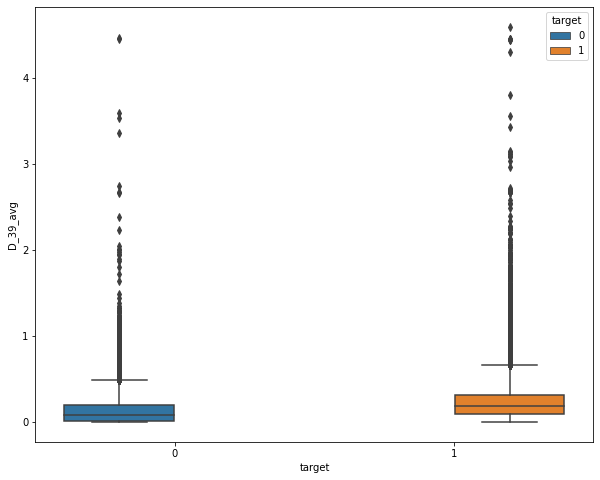

In [112]:
X = train_deli[['customer_ID', 'D_39', 'target']]

data_1 = pd.DataFrame(X.groupby(['customer_ID'])['D_39', 'target'].mean())
data_1['customer_ID'] = data_1.index
data_1 = data_1.reset_index(drop = True)
data_1 = data_1[['customer_ID', 'target', 'D_39']]
data_1.columns = ['customer_ID', 'target', 'D_39_avg']

plt.figure(figsize = (10, 8))
plot = sns.boxplot(x = 'target', y = 'D_39_avg', hue = 'target', data = data_1)

In [113]:
data_1.head()

,customer_ID,target,D_39_avg
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,0.010704
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,0.215210
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,0.004181
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.048859
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,0.004642


In [38]:
X['customer_ID'][X['target'] == 0].unique()

array(['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a',
       '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5',
       '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1',
       ...,
       'ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286',
       'ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6',
       'fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681'],
      dtype=object)

In [39]:
X['customer_ID'][X['target'] == 1].unique()

array(['0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85',
       '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6',
       '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e',
       ...,
       'fffe3ec7cdbc1caac845c884b389ed347bfc1da9d09731ade6e6a342e13184d3',
       'fffe5008118592b867d89647fc840c45858860f596d98b0c1b94aa84a2311b6b',
       'ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf388145b2c3d01967fcce461'],
      dtype=object)

In [59]:
# creating list
list = [10, 14, 20, 25, 12.5, 13, 0, 50]
 
# creating series
series = pd.Series(list)
 
# calling method
result = series.pct_change()
result

0         NaN
1    0.400000
2    0.428571
3    0.250000
4   -0.500000
5    0.040000
6   -1.000000
7         inf
dtype: float64

In [72]:
A = X[X['customer_ID'] == '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5']
pd.Series(A['D_39'].to_list()).pct_change().mean()

29.727981555327997

In [73]:
B = X[X['customer_ID'] == '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6']
pd.Series(B['D_39'].to_list()).pct_change().mean()

71.41819087563753

In [80]:
Z = pd.DataFrame(X.groupby(['customer_ID', 'target'])['D_39'].pct_change())
Z.head()

,D_39
0,NaN
1,2.332031
2,14.843750
3,-0.973145
4,0.011719


In [117]:
Y = X[np.isin(X['customer_ID'], ['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1', '00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6', '0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e'])]

Z = Y.groupby('customer_ID')['D_39', 'target'].apply(lambda x: pd.Series(x.to_list()).pct_change().mean())
Z

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


AttributeError: 'DataFrame' object has no attribute 'to_list'

In [116]:
Z = pd.DataFrame(Z)
Z.index[0][0]

'0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'